## Tutorial 1 - Autoencoder

In this example, we will use an autoencoder to 'learn' to recrate hand written digits.

In [8]:
import numpy as np

### Load and normalize our data

In [9]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


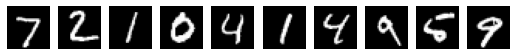

In [5]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

### Create an autoencoder model.

In [6]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 6 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 6)                 606       
                                                                 
 dense_4 (Dense)             (None, 100)               700       
                                                                 
 dense_5 (Dense)             (None, 300)               30300     
                                                                 
 dense_6 (Dense)             (None, 500)               1

### Train the autoencoder model.

In [7]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 18s 34ms/step - loss: 0.2022 - val_loss: 0.1497
Epoch 2/10
469/469 [==============================] - 16s 34ms/step - loss: 0.1435 - val_loss: 0.1385
Epoch 3/10
469/469 [==============================] - 15s 32ms/step - loss: 0.1366 - val_loss: 0.1342
Epoch 4/10
469/469 [==============================] - 14s 29ms/step - loss: 0.1327 - val_loss: 0.1310
Epoch 5/10
469/469 [==============================] - 14s 30ms/step - loss: 0.1299 - val_loss: 0.1291
Epoch 6/10
469/469 [==============================] - 13s 29ms/step - loss: 0.1277 - val_loss: 0.1272
Epoch 7/10
469/469 [==============================] - 14s 30ms/step - loss: 0.1259 - val_loss: 0.1259
Epoch 8/10
469/469 [==============================] - 12s 27ms/step - loss: 0.1244 - val_loss: 0.1247
Epoch 9/10
469/469 [==============================] - 12s 26ms/step - loss: 0.1231 - val_loss: 0.1239
Epoch 10/10
469/469 [==============================] - 12s 26ms/step - loss: 0.122

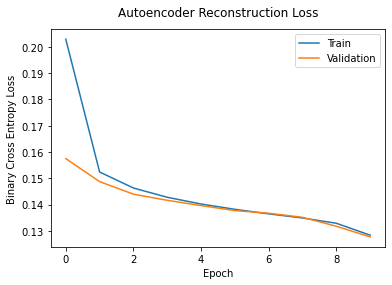

In [35]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

### Test the autoencoder model by reconstructing the test images and visually inspecting the results.

313/313 [==============================] - 2s 7ms/step


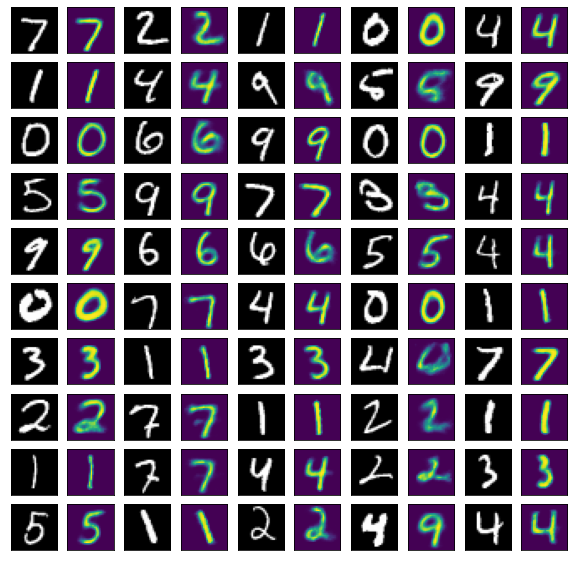

In [36]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### Save the autoencoder for later user.

In [37]:
autoencoder.save('initially_trained_autoencoder.h5')

The latent_vec_len parameter represents the size of the bottleneck layer in the autoencoder, which is the layer that compresses the input data into a lower-dimensional representation. A smaller value of latent_vec_len would result in a more compressed representation, while a larger value would result in a less compressed representation.

So when the bottleneck parameter is set to 6 it resulted in loss of information and reduced model capacity, which has lead to lower reconstruction quality of the output image.

Observing this if we increase the parameter to 100, model would be able to capture more detailed features from the input data
and the output might me more sharper but at the same time the model will take longer time to train.